In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lade den Datensatz
df = pd.read_csv('C:/Users\heppl/DS Projehtarbeit/Data/day.csv')

In [3]:
df. head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:

print(df['weathersit'].value_counts())
print(df['weathersit'].value_counts().sum()/2)
print(df['season'].value_counts())

weathersit
1    463
2    247
3     21
Name: count, dtype: int64
365.5
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


In [5]:
# "instant" Spalte löschen
df.drop(columns=["instant"], inplace=True)

# Ersetze die Zahlen in 'season' durch die entsprechenden Wörter
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Ersetze die Zahlen in 'weathersit' durch die entsprechenden Wetterkategorien
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Few Clouds', 3: 'Partly Cloudy'}) # in der Variablenbeschreibung des Datensatzes wird 3 doppelt geführt. max ist 3

# Spalten umbenennen
df = df.rename(columns={'dteday': 'date', 'mnth': 'month', 'cnt': 'distribution', 'hr': 'hour', 'yr': 'year'})

# Zeige die ersten Zeilen des Datensatzes
print(df.head())



         date  season  year  month  holiday  weekday  workingday  weathersit  \
0  2011-01-01  Winter     0      1        0        6           0  Few Clouds   
1  2011-01-02  Winter     0      1        0        0           0  Few Clouds   
2  2011-01-03  Winter     0      1        0        1           1       Clear   
3  2011-01-04  Winter     0      1        0        2           1       Clear   
4  2011-01-05  Winter     0      1        0        3           1       Clear   

       temp     atemp       hum  windspeed  casual  registered  distribution  
0  0.344167  0.363625  0.805833   0.160446     331         654           985  
1  0.363478  0.353739  0.696087   0.248539     131         670           801  
2  0.196364  0.189405  0.437273   0.248309     120        1229          1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454          1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518          1600  


In [6]:
# Zeige die grundlegenden Informationen zum Datensatz
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          731 non-null    object 
 1   season        731 non-null    object 
 2   year          731 non-null    int64  
 3   month         731 non-null    int64  
 4   holiday       731 non-null    int64  
 5   weekday       731 non-null    int64  
 6   workingday    731 non-null    int64  
 7   weathersit    731 non-null    object 
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  windspeed     731 non-null    float64
 12  casual        731 non-null    int64  
 13  registered    731 non-null    int64  
 14  distribution  731 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 85.8+ KB
None


In [7]:
# Statistiken der numerischen Spalten anzeigen
print(df.describe())

             year       month     holiday     weekday  workingday        temp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.500684    6.519836    0.028728    2.997264    0.683995    0.495385   
std      0.500342    3.451913    0.167155    2.004787    0.465233    0.183051   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.059130   
25%      0.000000    4.000000    0.000000    1.000000    0.000000    0.337083   
50%      1.000000    7.000000    0.000000    3.000000    1.000000    0.498333   
75%      1.000000   10.000000    0.000000    5.000000    1.000000    0.655417   
max      1.000000   12.000000    1.000000    6.000000    1.000000    0.861667   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.172367   
std      0.162961    0.142429    0.077498   686.622488  1

In [8]:
# Fehlende Werte prüfen
print(df.isnull().sum())
df = df.dropna()

date            0
season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
distribution    0
dtype: int64


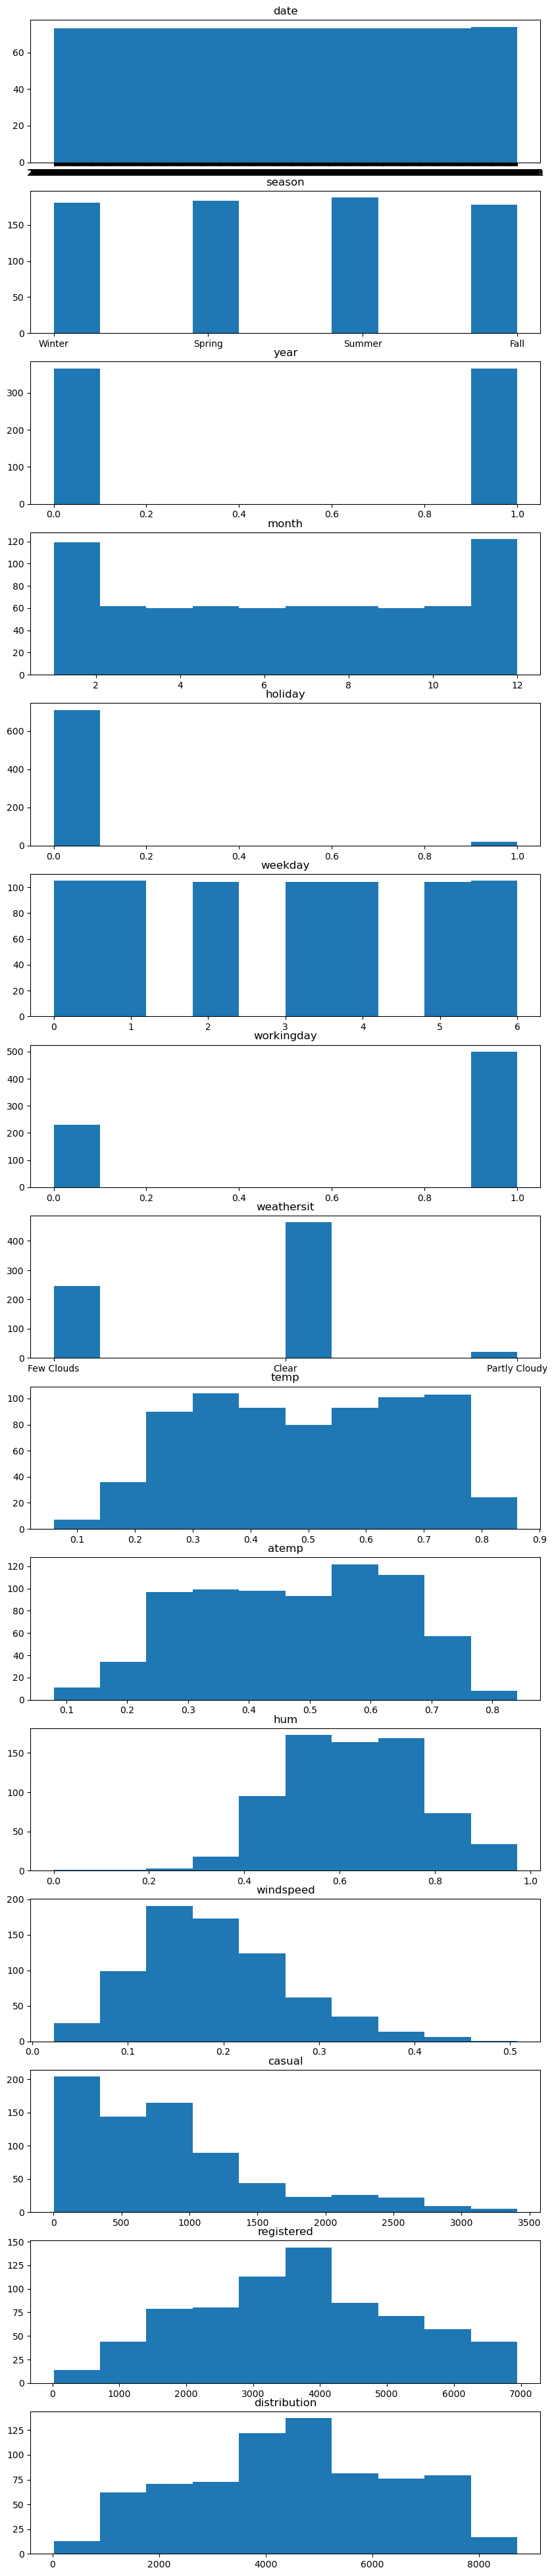

In [9]:
fig, ax = plt.subplots(df.shape[1], 1, figsize=(10, 50))
for i, column in enumerate(df.columns):
    ax[i].hist(df[column])
    ax[i].set_title(column)

Datenverteilung der Zielvariablen Distribution (Nachfrage)

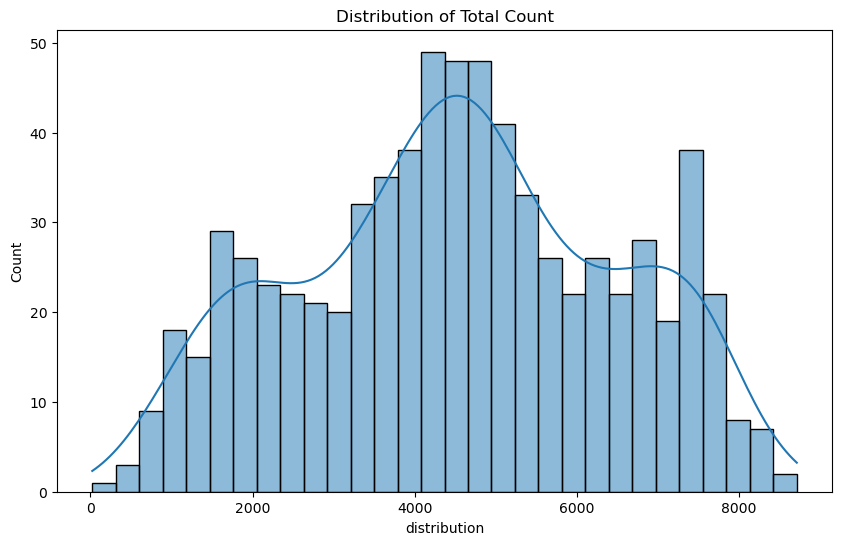

In [10]:
# Datenverteilung der Zielvariablen Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['distribution'], bins=30, kde=True)
plt.title('Distribution of Total Count')
plt.show()

Trends und Aufteilung der Nachfrage

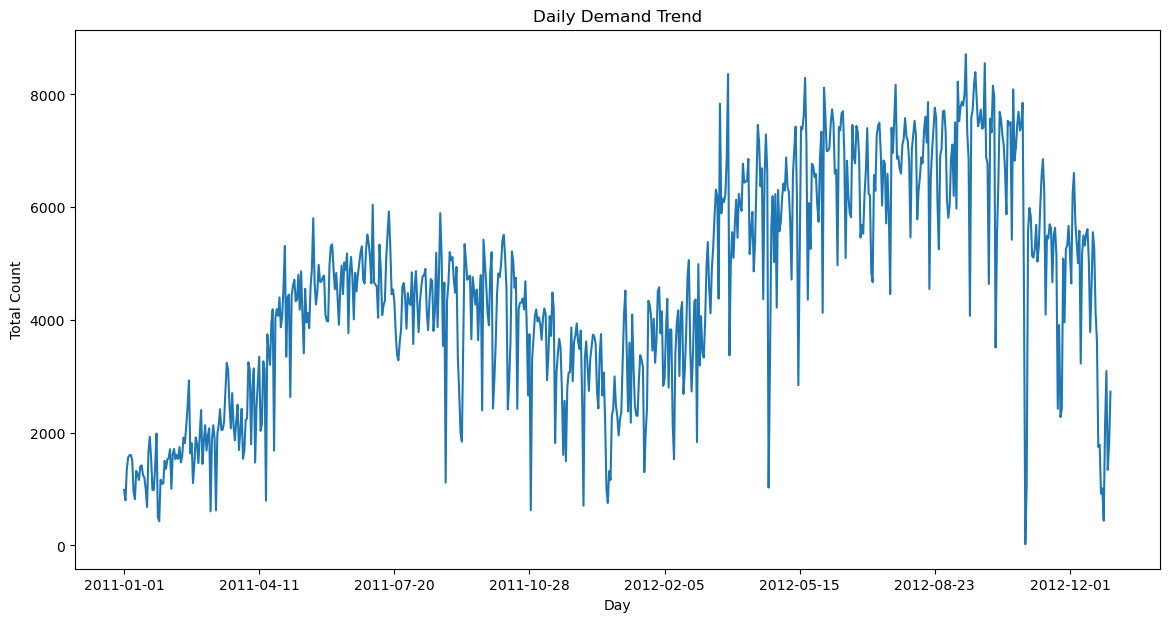

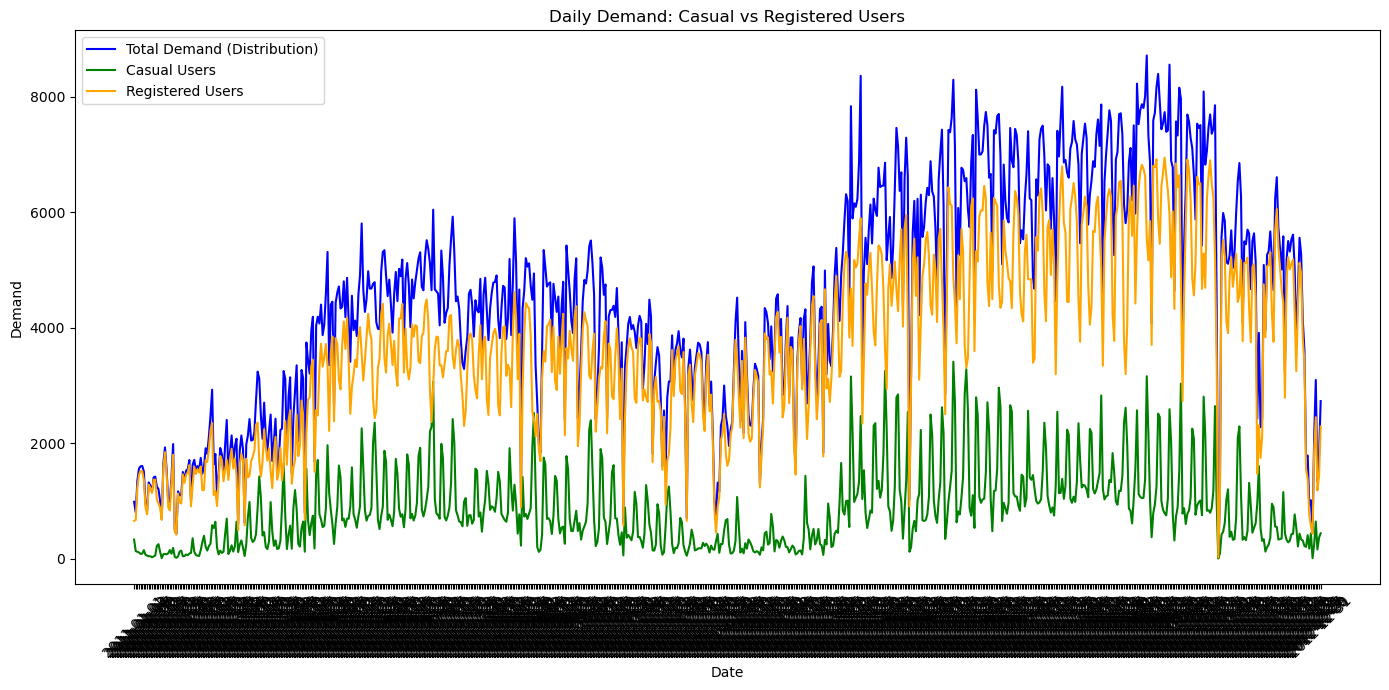

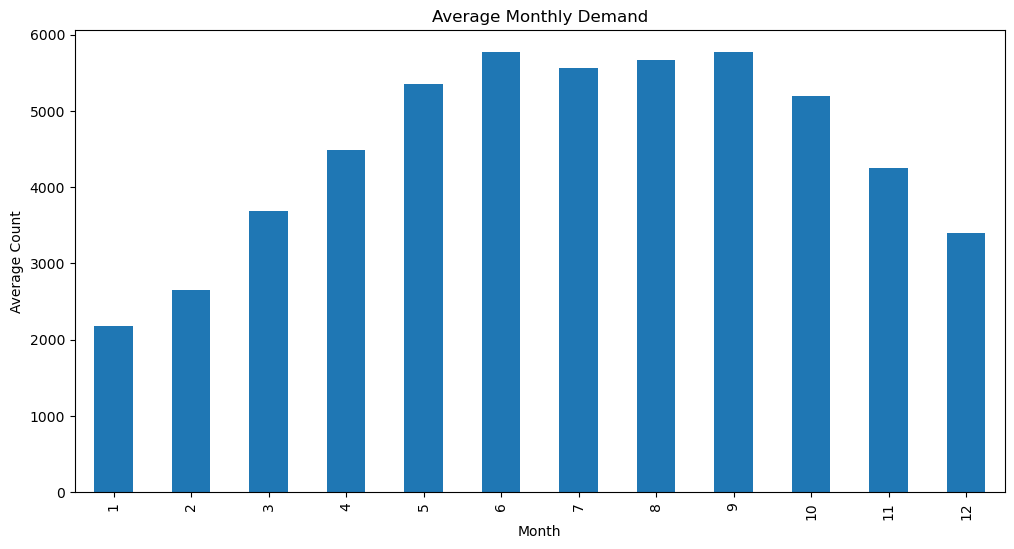

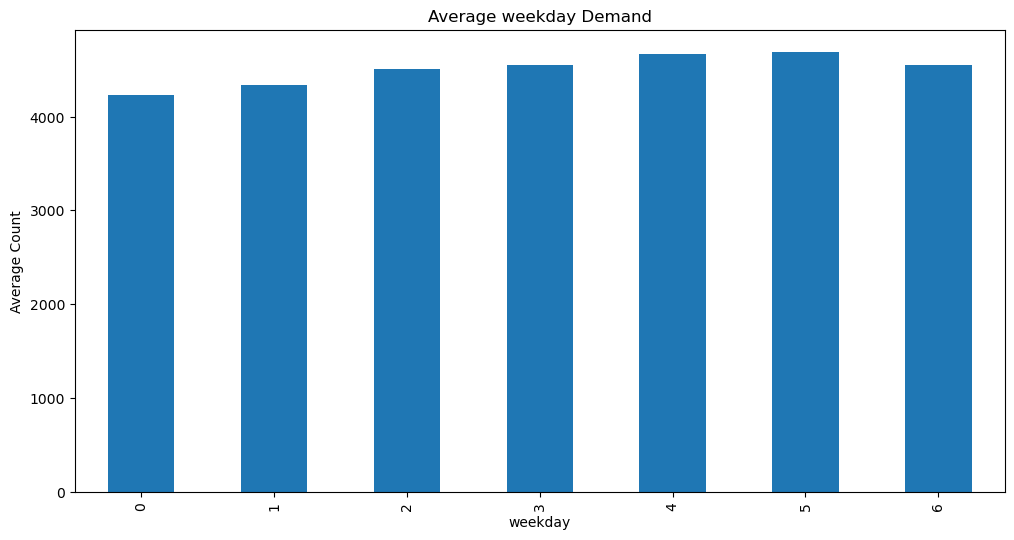

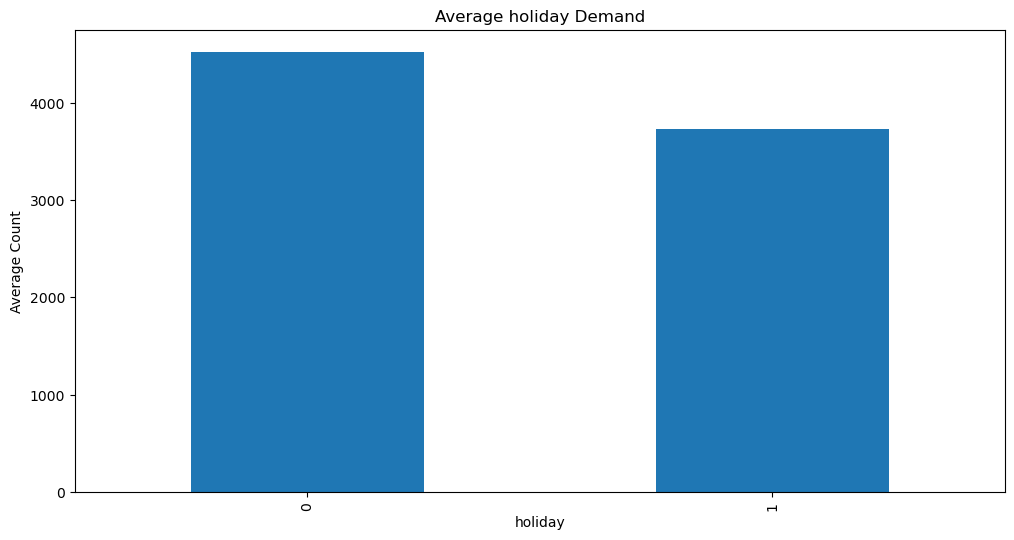

In [11]:
# Trend über die Zeit
plt.figure(figsize=(14, 7))
df.groupby('date')['distribution'].mean().plot()
plt.title('Daily Demand Trend')
plt.xlabel('Day')
plt.ylabel('Total Count')
plt.show()

# Erstelle eine neue Figur und Achsen
plt.figure(figsize=(14, 7))

# Plot der täglichen Gesamtnachfrage (distribution)
plt.plot(df['date'], df['distribution'], label='Total Demand (Distribution)', color='blue')

# Plot der casual Nachfrage
plt.plot(df['date'], df['casual'], label='Casual Users', color='green')

# Plot der registered Nachfrage
plt.plot(df['date'], df['registered'], label='Registered Users', color='orange')

# Hinzufügen von Titel und Labels
plt.title('Daily Demand: Casual vs Registered Users')
plt.xlabel('Date')
plt.ylabel('Demand')

# Anzeige der Legende
plt.legend()

# Rotation der x-Achse für bessere Lesbarkeit der Datumswerte
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Durchschnittliche monatliche Nachfrage 
plt.figure(figsize=(12, 6))
df.groupby('month')['distribution'].mean().plot(kind='bar')
plt.title('Average Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.show()

# Durchschnittliche Wochentags-Nachfrage 
plt.figure(figsize=(12, 6))
df.groupby('weekday')['distribution'].mean().plot(kind='bar')
plt.title('Average weekday Demand')
plt.xlabel('weekday')
plt.ylabel('Average Count')
plt.show()

# Durchschnittliche Ferien-Nachfrage 
plt.figure(figsize=(12, 6))
df.groupby('holiday')['distribution'].mean().plot(kind='bar')
plt.title('Average holiday Demand')
plt.xlabel('holiday')
plt.ylabel('Average Count')
plt.show()

Untersuchung von Ausreißern

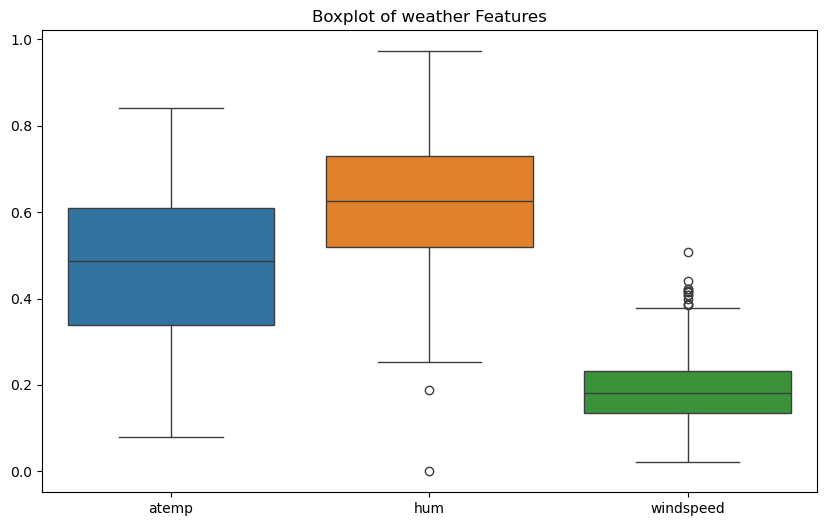

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['atemp', 'hum', 'windspeed']])
plt.title('Boxplot of weather Features')
plt.show()

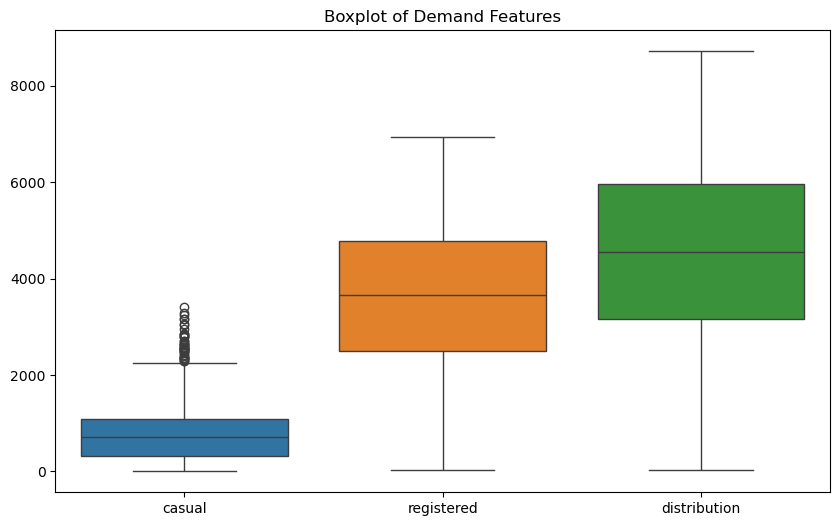

In [13]:
# Boxplot für die Features casual, registered und distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['casual', 'registered', 'distribution']])
plt.title('Boxplot of Demand Features')
plt.show()


In [14]:
# Berechnung Mittelwert und Standardabweichung
mean_distribution = df['casual'].mean()
std_distribution = df['casual'].std()

# Definieren eines Schwellenwertes für Ausreißer (x * Standardabweichungen)
threshold = 3
outliers = df[(df['casual'] > mean_distribution + threshold * std_distribution) | 
              (df['casual'] < mean_distribution - threshold * std_distribution)]

# Ausgabe der Ausreißer
print(f'Anzahl der Ausreißer: {len(outliers)}')
outliers[['date', 'casual']]


Anzahl der Ausreißer: 8


,date,casual
184,2011-07-04,3065
441,2012-03-17,3155
462,2012-04-07,3252
504,2012-05-19,3410
512,2012-05-27,3283
532,2012-06-16,2963
623,2012-09-15,3160
644,2012-10-06,3031


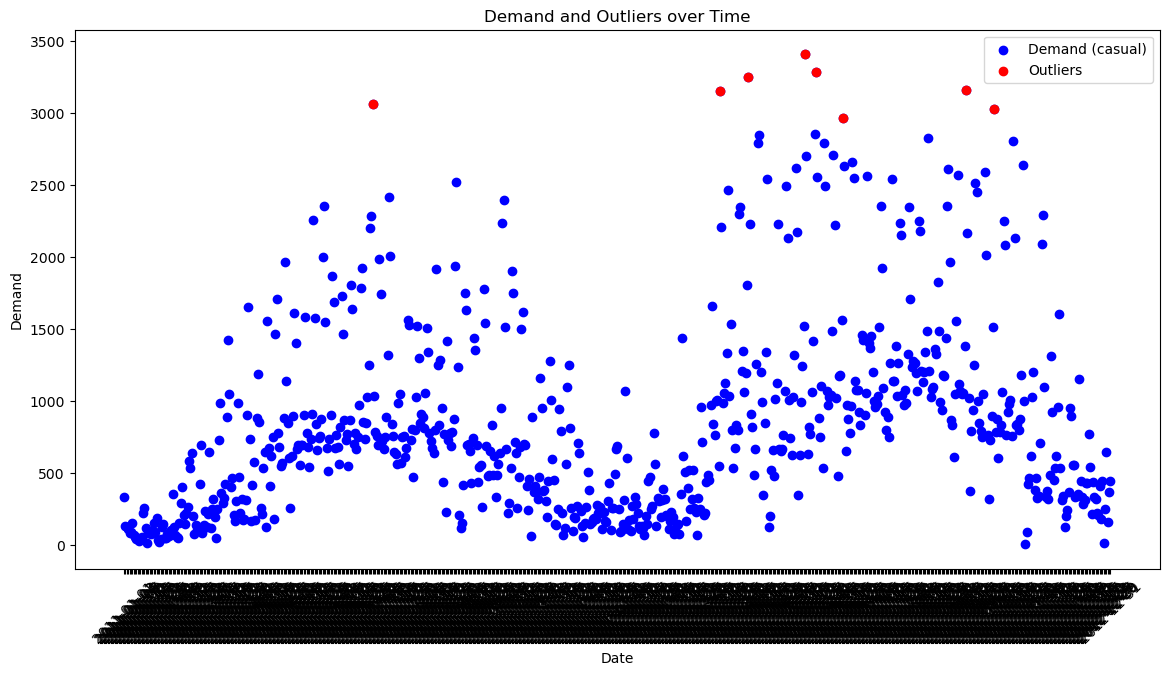

In [15]:
plt.figure(figsize=(14, 7))
plt.scatter(df['date'], df['casual'], label='Demand (casual)', color='blue')
plt.scatter(outliers['date'], outliers['casual'], color='red', label='Outliers')
plt.title('Demand and Outliers over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Untersuchung von Zusammenhang zwischen den Features und der Nachfrage (Target)

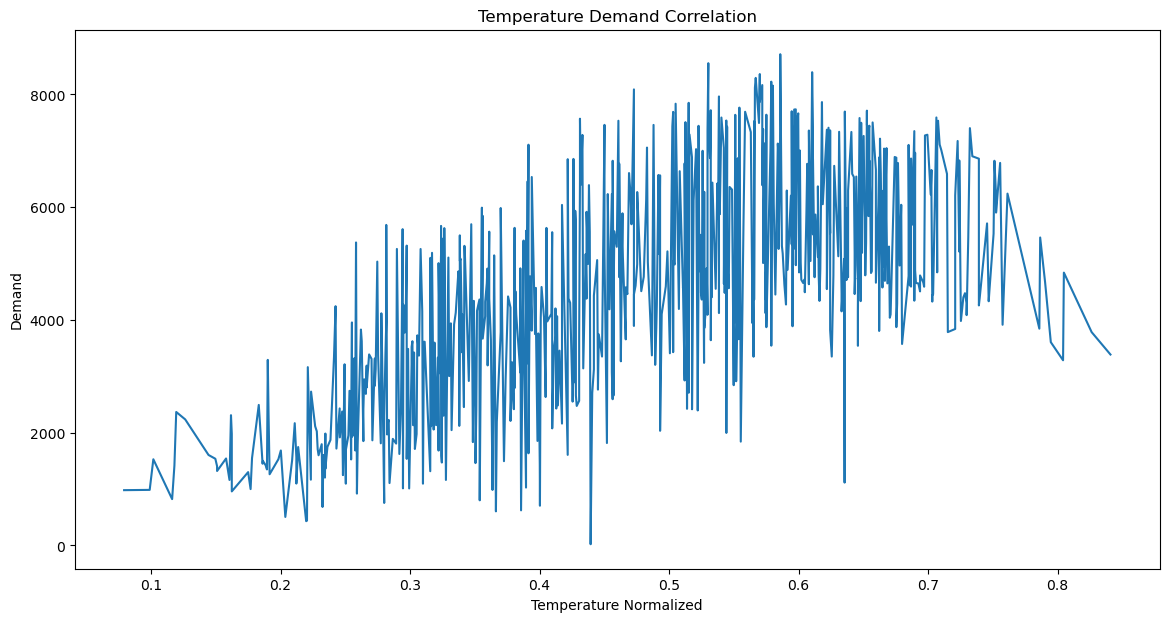

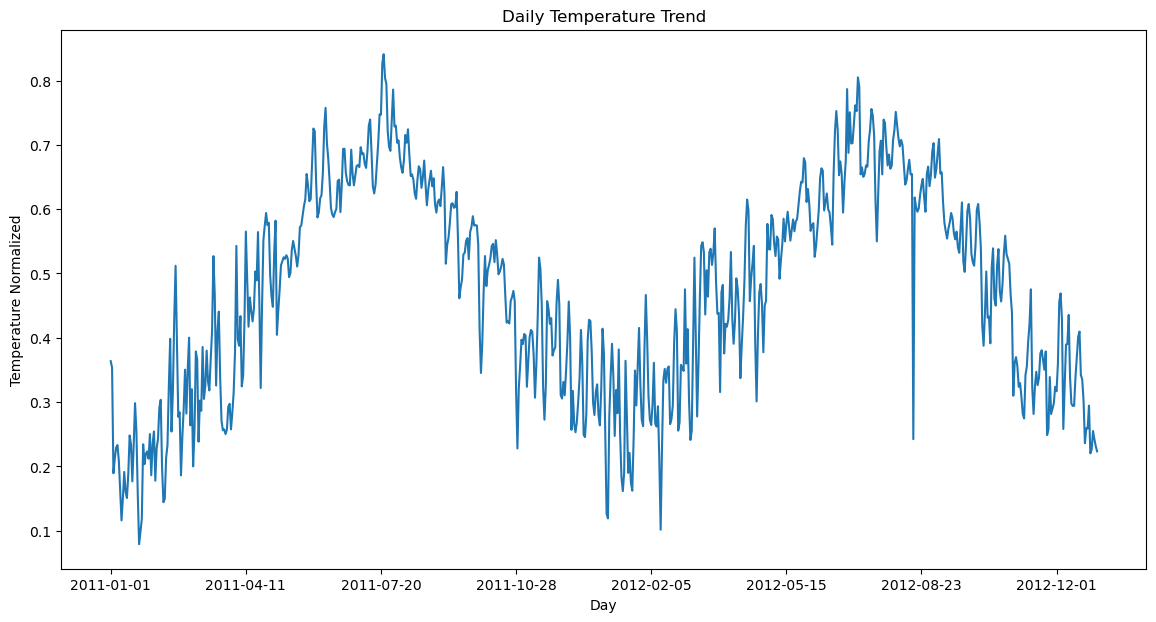

In [16]:
# Zusammenhang zwischen Temperatur und Distribution
plt.figure(figsize=(14, 7))
df.groupby('atemp')['distribution'].mean().plot()
plt.title('Temperature Demand Correlation')
plt.xlabel('Temperature Normalized')
plt.ylabel('Demand')
plt.show()

# Temperaturtrend über die Zeit
plt.figure(figsize=(14, 7))
df.groupby('date')['atemp'].mean().plot()
plt.title('Daily Temperature Trend')
plt.xlabel('Day')
plt.ylabel('Temperature Normalized')
plt.show()

Text(0, 0.5, 'Demand')

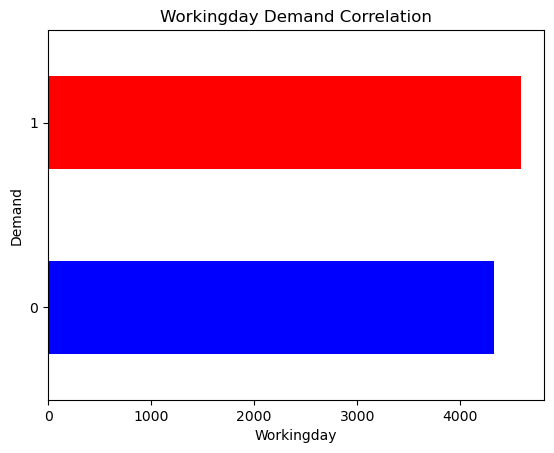

In [17]:
# Untersuchung der Arbeitstags Nachfrage Korrelation
colors = ['blue','red']
df.groupby('workingday')['distribution'].mean().sort_values(ascending=True).tail(20).plot.barh(color=colors)

plt.title('Workingday Demand Correlation')
plt.xlabel('Workingday')
plt.ylabel('Demand')

Preparieren der Daten für die Korrelationsmatrix

In [18]:
df.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'distribution'],
      dtype='object')

In [19]:
# Erstelle Dummy-Variablen für 'season' und 'weathersit'
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

# Fortlaufende Zahl für jedes Datum erstellen (beginnend bei 1)
df['date_numeric'] = np.arange(1, len(df) + 1)

# Entferne die ursprüngliche 'date'-Spalte, falls gewünscht
df = df.drop(columns=['date'])

print(df.head())
df.dtypes

   year  month  holiday  weekday  workingday      temp     atemp       hum  \
0     0      1        0        6           0  0.344167  0.363625  0.805833   
1     0      1        0        0           0  0.363478  0.353739  0.696087   
2     0      1        0        1           1  0.196364  0.189405  0.437273   
3     0      1        0        2           1  0.200000  0.212122  0.590435   
4     0      1        0        3           1  0.226957  0.229270  0.436957   

   windspeed  casual  registered  distribution  season_Spring  season_Summer  \
0   0.160446     331         654           985          False          False   
1   0.248539     131         670           801          False          False   
2   0.248309     120        1229          1349          False          False   
3   0.160296     108        1454          1562          False          False   
4   0.186900      82        1518          1600          False          False   

   season_Winter  weathersit_Few Clouds  weathersi

year                          int64
month                         int64
holiday                       int64
weekday                       int64
workingday                    int64
temp                        float64
atemp                       float64
hum                         float64
windspeed                   float64
casual                        int64
registered                    int64
distribution                  int64
season_Spring                  bool
season_Summer                  bool
season_Winter                  bool
weathersit_Few Clouds          bool
weathersit_Partly Cloudy       bool
date_numeric                  int32
dtype: object

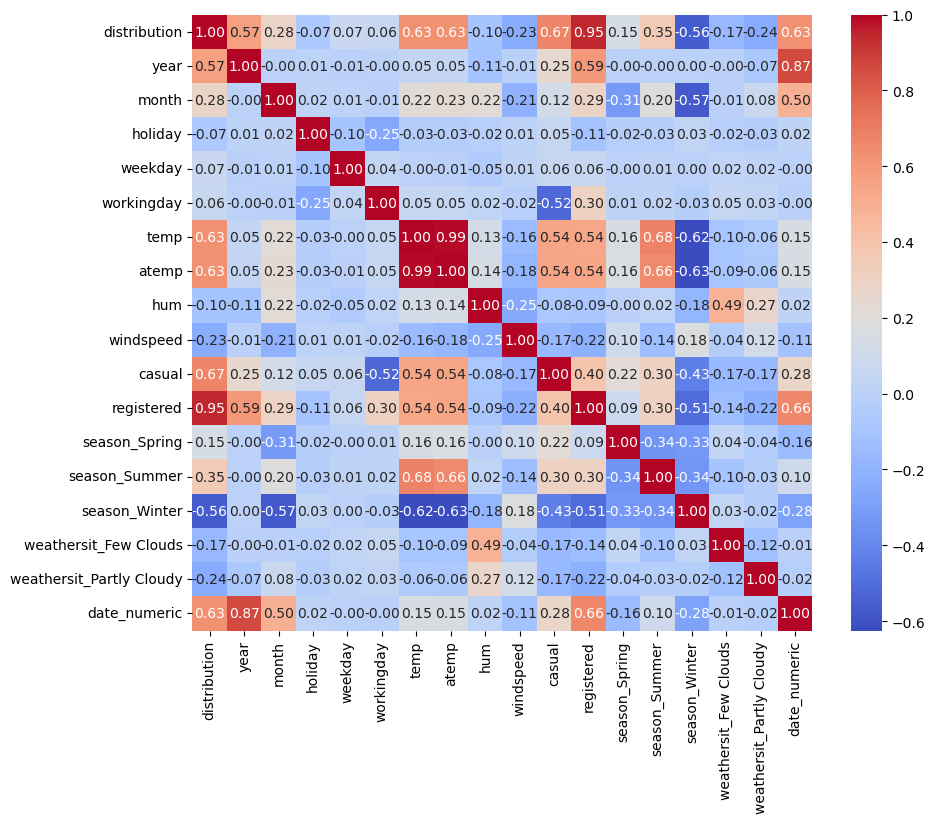

In [20]:
# Berechne Korrelationen nur für numerische Features
corr = df.corr()

# Sortieren der Matrix so, dass 'distribution' die erste Zeile/Spalte ist
cols = ['distribution'] + [col for col in corr.columns if col != 'distribution']
corr = corr.loc[cols, cols]

# Heatmap erstellen
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Erste Modellierung mittels Linearen Regression

In [21]:
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
import sklearn.metrics

# Features ohne "casual" und Zielvariable definieren
X = df.drop(columns=['distribution', 'year', 'temp', 'casual']) # temp wird wegen Multikollinearität entfernt
y = df['distribution'] # casual + registered = target 

# Features ohne "registered" und "casual" definieren
X2 = df.drop(columns=['distribution', 'year', 'temp', 'registered', 'casual']) 
y2 = df['distribution'] # casual + registered = target

print(X2.head())
X.head()

   month  holiday  weekday  workingday     atemp       hum  windspeed  \
0      1        0        6           0  0.363625  0.805833   0.160446   
1      1        0        0           0  0.353739  0.696087   0.248539   
2      1        0        1           1  0.189405  0.437273   0.248309   
3      1        0        2           1  0.212122  0.590435   0.160296   
4      1        0        3           1  0.229270  0.436957   0.186900   

   season_Spring  season_Summer  season_Winter  weathersit_Few Clouds  \
0          False          False           True                   True   
1          False          False           True                   True   
2          False          False           True                  False   
3          False          False           True                  False   
4          False          False           True                  False   

   weathersit_Partly Cloudy  date_numeric  
0                     False             1  
1                     False       

,month,holiday,weekday,workingday,atemp,hum,windspeed,registered,season_Spring,season_Summer,season_Winter,weathersit_Few Clouds,weathersit_Partly Cloudy,date_numeric
0,1,0,6,0,0.363625,0.805833,0.160446,654,False,False,True,True,False,1
1,1,0,0,0,0.353739,0.696087,0.248539,670,False,False,True,True,False,2
2,1,0,1,1,0.189405,0.437273,0.248309,1229,False,False,True,False,False,3
3,1,0,2,1,0.212122,0.590435,0.160296,1454,False,False,True,False,False,4
4,1,0,3,1,0.229270,0.436957,0.186900,1518,False,False,True,False,False,5


In [22]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modell erstellen und trainieren
lrx_model = LinearRegression()
lrx_model.fit(X_trainx, y_trainx)

# Modellvorhersage und Bewertung
y_pred_lrx = lrx_model.predict(X_testx)

# R²-Score berechnen
r2_lrx = r2_score(y_testx, y_pred_lrx)
print(f'R²-Score: {r2_lrx}')

# MSE berechnen
mse_lrx = mean_squared_error(y_testx, y_pred_lrx)
print(f'MSE: {mse_lrx}')

NameError: name 'train_test_split' is not defined

Lineare Regression Performancevergleich mit Datensatz ohne "registered" und "casual"

In [ ]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=43)

# Modell erstellen und trainieren
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Modellvorhersage und Bewertung
y_pred_lr = lr_model.predict(X_test)

print(X_train.columns)

# R²-Score berechnen
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R²-Score Lineare Regression: {r2_lr}')

# MSE berechnen
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE Lineare Reggresion: {mse_lr}')

Index(['month', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Few Clouds', 'weathersit_Partly Cloudy', 'date_numeric'],
      dtype='object')
R²-Score Lineare Regression: 0.8246123136678025
MSE Lineare Reggresion: 648059.4237120695


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Erstellen von Polynom-Features 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Lineare Regression trainieren mit Polynomial-Features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Vorhersagen auf den Testdaten
y_pred_poly = poly_model.predict(X_test_poly)

# R²-Score berechnen
r2_poly = r2_score(y_test, y_pred_poly)
print(f'R²-Score Polynomial Regression (Degree 3): {r2_poly}')

# MSE berechnen
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'MSE mit Polynomial-Features (Degree 3): {mse_poly}')


R²-Score Polynomial Regression (Degree 3): 0.5178286617106631
MSE mit Polynomial-Features (Degree 3): 1781628.3808568667


2. Modell (Random Forest) trainieren und testen

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialisiere Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trainiere das Modell
rf_model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred_rf = rf_model.predict(X_test)

# Berechne MSE und R²-Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest R²-Score: {r2_rf}')
print(f'Random Forest MSE: {mse_rf}')


Random Forest R²-Score: 0.8817337177110467
Random Forest MSE: 436995.20957006805


Kreuzvalidierung für Lineare Regression und Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

# 5-fache Kreuzvalidierung für beide Modelle
rf_cv_r2 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
lr_cv_r2 = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
poly_cv_r2 = cross_val_score(poly_model, X_train_poly, y_train, cv=5, scoring='r2')
print(X_train.columns)
print(f'Random Forest CV R²-Score: {rf_cv_r2.mean()}')
print(f'Linear Regression CV R²-Score: {lr_cv_r2.mean()}')
print(f'Polynomial Regression (Degree 3) CV R²-Score: {poly_cv_r2.mean()}')


Index(['month', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Few Clouds', 'weathersit_Partly Cloudy', 'date_numeric'],
      dtype='object')
Random Forest CV R²-Score: 0.8714534234680265
Linear Regression CV R²-Score: 0.8064985918589448
Polynomial Regression (Degree 3) CV R²-Score: 0.7147377499398886


Hyperparameter-Optimierung für Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definiere den Parameterraum für Random Forest (angepasst)
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_features': ['sqrt', 'log2', None],  
    'max_depth': [None, 5, 10, 20, 30, 40, 50, 60, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV für Random Forest
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=43), 
                                       param_distributions=param_dist_rf, 
                                       n_iter=20, scoring='r2', cv=5, 
                                       random_state=42, n_jobs=-1, error_score='raise')

# Fit auf Trainingsdaten
random_search_rf.fit(X_train, y_train)

# Beste Parameter und Ergebnisse ausgeben
print("Beste Parameter für Random Forest: ", random_search_rf.best_params_)
print("Beste R²-Score für Random Forest: ", random_search_rf.best_score_)

# Vorhersagen und MSE für Random Forest
y_pred_rf2 = random_search_rf.predict(X_test)
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
print(f"Random Forest MSE: {mse_rf2}")



Beste Parameter für Random Forest:  {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 60, 'bootstrap': False}
Beste R²-Score für Random Forest:  0.8838688620496358
Random Forest MSE: 380030.1177306122


Feature-Imprortance Random Forest

                     Feature  Importance
12              date_numeric    0.393034
4                      atemp    0.216608
9              season_Winter    0.087053
0                      month    0.086013
5                        hum    0.070354
6                  windspeed    0.053924
8              season_Summer    0.021448
11  weathersit_Partly Cloudy    0.019715
2                    weekday    0.019051
10     weathersit_Few Clouds    0.015761
3                 workingday    0.007138
7              season_Spring    0.006322
1                    holiday    0.003579


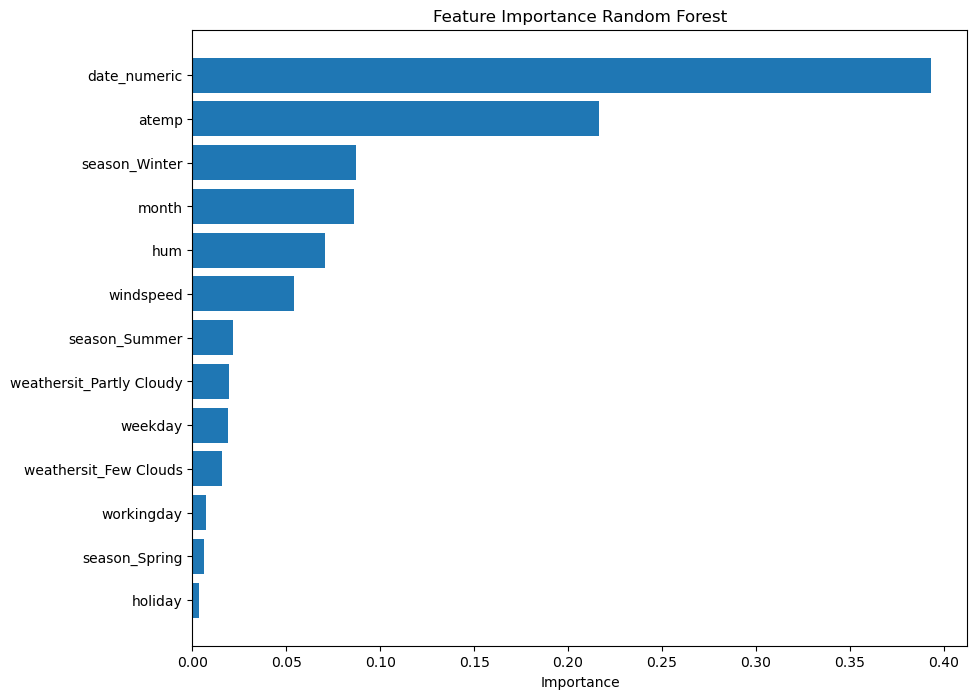

In [ ]:
best_rf_model = random_search_rf.best_estimator_

# Berechne die Feature-Wichtigkeit für das beste XGBoost-Modell
importances = best_rf_model.feature_importances_

# Erstelle eine DataFrame zur besseren Übersicht
features = X_train.columns  # Annahme: Spaltennamen sind in X_train definiert
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sortiere nach Wichtigkeit
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt

# Feature-Wichtigkeit plotten
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Random Forest')
plt.gca().invert_yaxis()
plt.show()


3. Modell Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBRegressor

# Definition des XGBoost Modell
xgb_model = XGBRegressor()

# Modell trainieren
xgb_model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred_xgb = xgb_model.predict(X_test)

# Performance-Metriken
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R²-Score: {r2_xgb}")
print(f"XGBoost MSE: {mse_xgb}")


NameError: name 'X_train' is not defined

Cross-Validation für XGBoost

In [ ]:
# Cross-Validation für XGBoost
xgb_cv_r2 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

print(f"XGBoost Cross-Validation R²-Score: {xgb_cv_r2.mean()}")
print(f'Random Forest Cross-Validation R²-Score: {rf_cv_r2.mean()}')
print(f'Linear Regression Cross-Validation R²-Score: {lr_cv_r2.mean()}')

XGBoost Cross-Validation R²-Score: 0.8637480216635367
Random Forest Cross-Validation R²-Score: 0.8714534234680265
Linear Regression Cross-Validation R²-Score: 0.8064985918589448


Hyperparameter-Optimierung Random Search für XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definiere den Parameterraum für XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 7, 9],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0]
}

# RandomizedSearchCV für XGBoost mit dem bereits definierten Modell
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                       n_iter=20, scoring='r2', cv=5, random_state=43, n_jobs=-1)

# Fit auf Trainingsdaten
random_search_xgb.fit(X_train, y_train)

# Beste Parameter und Ergebnisse ausgeben
print("Beste Parameter: ", random_search_xgb.best_params_)
print("Beste R²-Score: ", random_search_xgb.best_score_)

# Vorhersagen auf den Testdaten machen
best_xgb_model = random_search_xgb.best_estimator_
y_pred_xgb2 = best_xgb_model.predict(X_test)

# MSE berechnen
mse_xgb2 = mean_squared_error(y_test, y_pred_xgb2)
print(f"XGBoost MSE nach Hyperparameter-Optimierung: {mse_xgb2}")



NameError: name 'xgb_model' is not defined

                     Feature  Importance
9              season_Winter    0.327143
12              date_numeric    0.222569
4                      atemp    0.085396
11  weathersit_Partly Cloudy    0.069530
0                      month    0.061890
8              season_Summer    0.051158
5                        hum    0.045919
10     weathersit_Few Clouds    0.032469
1                    holiday    0.031838
6                  windspeed    0.024374
7              season_Spring    0.019389
2                    weekday    0.015168
3                 workingday    0.013157


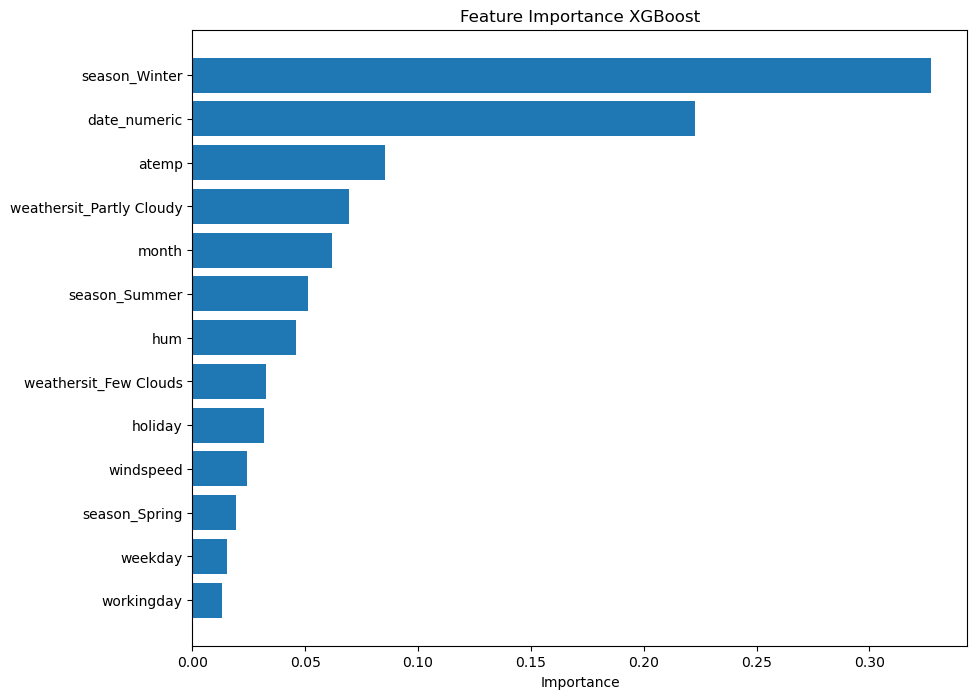

In [ ]:
# Berechne die Feature-Wichtigkeit für das beste XGBoost-Modell
importances = best_xgb_model.feature_importances_

# Erstelle eine DataFrame zur besseren Übersicht
features = X_train.columns  # Annahme: Spaltennamen sind in X_train definiert
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sortiere nach Wichtigkeit
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt

# Feature-Wichtigkeit plotten
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance XGBoost')
plt.gca().invert_yaxis()
plt.show()

Heatmaps der Random search

In [ ]:
# Erstelle ein DataFrame aus den Random Search-Ergebnissen für Random Forest
rf_results = pd.DataFrame(random_search_rf.cv_results_)

# Pivot-Tabelle erstellen, um min_samples_split und max_features als Achsen zu verwenden und den mean_test_score zu füllen
pivot_rf = rf_results.pivot_table(values='mean_test_score', index='param_min_samples_split', 
                                  columns='param_max_depth')



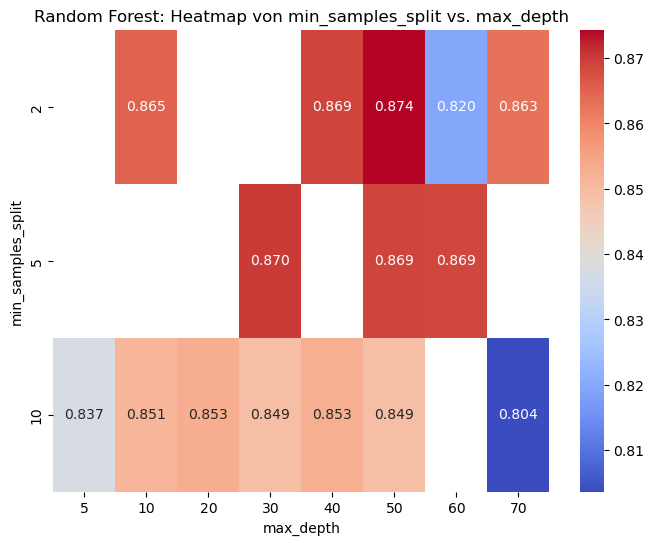

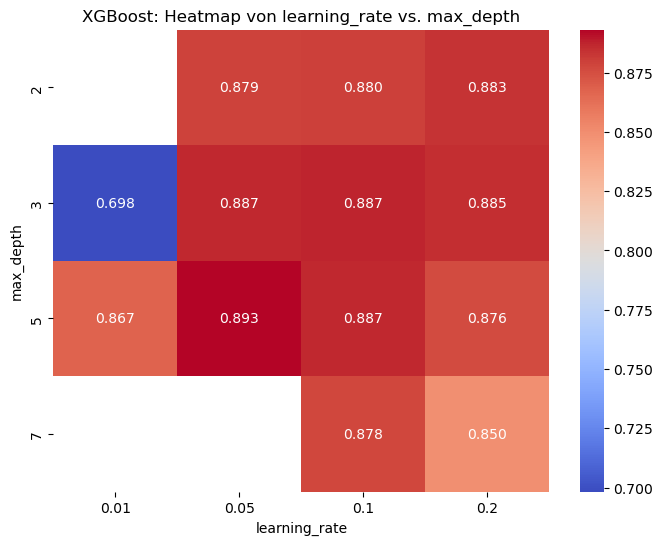

In [ ]:
# Erstelle ein DataFrame aus den Random Search-Ergebnissen für XGBoost
xgb_results = pd.DataFrame(random_search_xgb.cv_results_)

# Pivot-Tabelle erstellen, um learning_rate und max_depth als Achsen zu verwenden und den mean_test_score zu füllen
pivot_xgb = xgb_results.pivot_table(values='mean_test_score', index='param_max_depth', 
                                    columns='param_learning_rate')

# Heatmap für Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_rf, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Random Forest: Heatmap von min_samples_split vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
plt.show()

# Heatmap für XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_xgb, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('XGBoost: Heatmap von learning_rate vs. max_depth')
plt.xlabel('learning_rate')
plt.ylabel('max_depth')
plt.show()


Zusammenfassung der Ergebnisse

XGBoost Cross-Validation R²-Score: 0.8637480216635367
Random Forest Cross-Validation R²-Score: 0.8714534234680265
Linear Regression Cross-Validation R²-Score: 0.8064985918589448

Ergebnisse nach der Hyperparameter-Optimierung
Bester R²-Score für Random Forest:  0.8838688620496358
Bester R²-Score für XGBoost:  0.894794054013556

MSE Lineare Reggresion: 648059.4237120695
MSE Random Forest: 380030.1177306122
MSE XGBoost: 354361.524685754


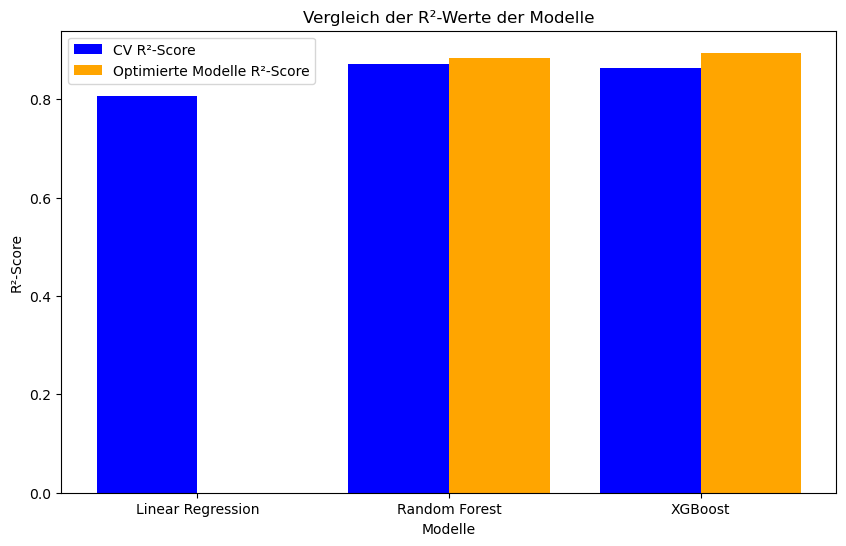

C:\Users\heppl\AppData\Local\Temp\ipykernel_3552\4197374928.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, palette='Reds_d')


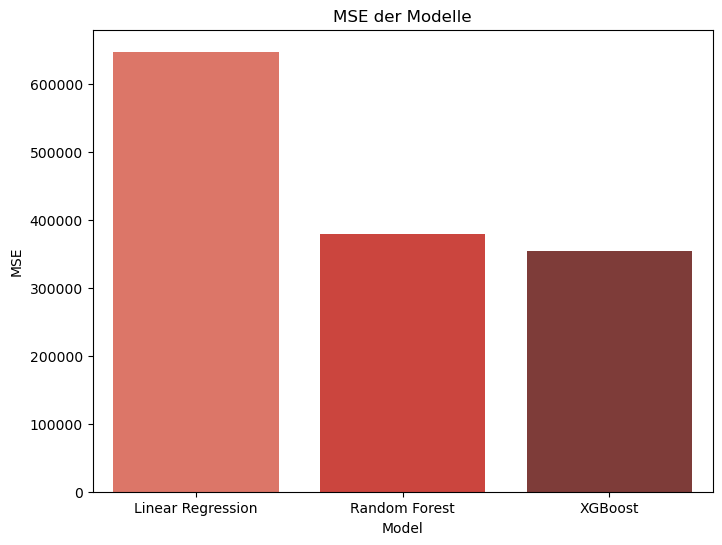

In [ ]:
import numpy as np
# Ergebnisse zusammenfassen

print(f"XGBoost Cross-Validation R²-Score: {xgb_cv_r2.mean()}")
print(f'Random Forest Cross-Validation R²-Score: {rf_cv_r2.mean()}')
print(f'Linear Regression Cross-Validation R²-Score: {lr_cv_r2.mean()}')

print('')
print('Ergebnisse nach der Hyperparameter-Optimierung')
print("Bester R²-Score für Random Forest: ", random_search_rf.best_score_)
print("Bester R²-Score für XGBoost: ", random_search_xgb.best_score_)

print('')
print(f'MSE Lineare Regression: {mse_lr}')
print(f'MSE Random Forest: {mse_rf2}')
print(f'MSE XGBoost: {mse_xgb2}')

model_results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Cross-Validation R²': [lr_cv_r2.mean(), rf_cv_r2.mean(), xgb_cv_r2.mean()],
    'Best R² (Optimized)': [None, random_search_rf.best_score_, random_search_xgb.best_score_],
    'MSE': [mse_lr, mse_rf2, mse_xgb2]
}

# DataFrame erstellen
results_df = pd.DataFrame(model_results)

# Balkendiagramm der R²-Werte
fig, ax = plt.subplots(figsize=(10, 6))

# Balken für Cross-Validation R²-Score
bar_width = 0.4
index = np.arange(len(results_df['Model']))

bars1 = ax.bar(index - bar_width/2, results_df['Cross-Validation R²'], bar_width, label='CV R²-Score', color='blue')

# Balken für optimierte R²-Score
bars2 = ax.bar(index + bar_width/2, results_df['Best R² (Optimized)'], bar_width, label='Optimierte Modelle R²-Score', color='orange')

# Achsen und Legende
ax.set_xlabel('Modelle')
ax.set_ylabel('R²-Score')
ax.set_title('Vergleich der R²-Werte der Modelle')
ax.set_xticks(index)
ax.set_xticklabels(results_df['Model'])
ax.legend()

plt.show()



# Balkendiagramm der MSE-Werte
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MSE', data=results_df, palette='Reds_d')
plt.title('MSE der Modelle')
plt.show()


Vergleich der tatsächlichen und vorhergesagten Werte

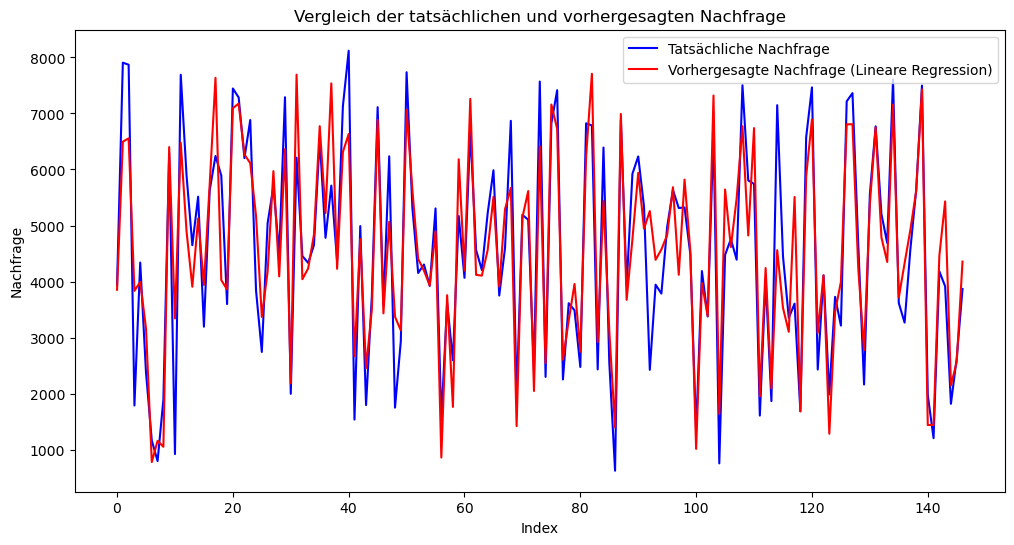

In [ ]:
plt.figure(figsize=(12, 6))

# Tatsächliche Werte
plt.plot(y_test.values, label='Tatsächliche Nachfrage', color='blue')

# Vorhergesagte Werte
plt.plot(y_pred_lr, label='Vorhergesagte Nachfrage (Lineare Regression)', color='red')

plt.xlabel('Index')
plt.ylabel('Nachfrage')
plt.title('Vergleich der tatsächlichen und vorhergesagten Nachfrage')
plt.legend()
plt.show()

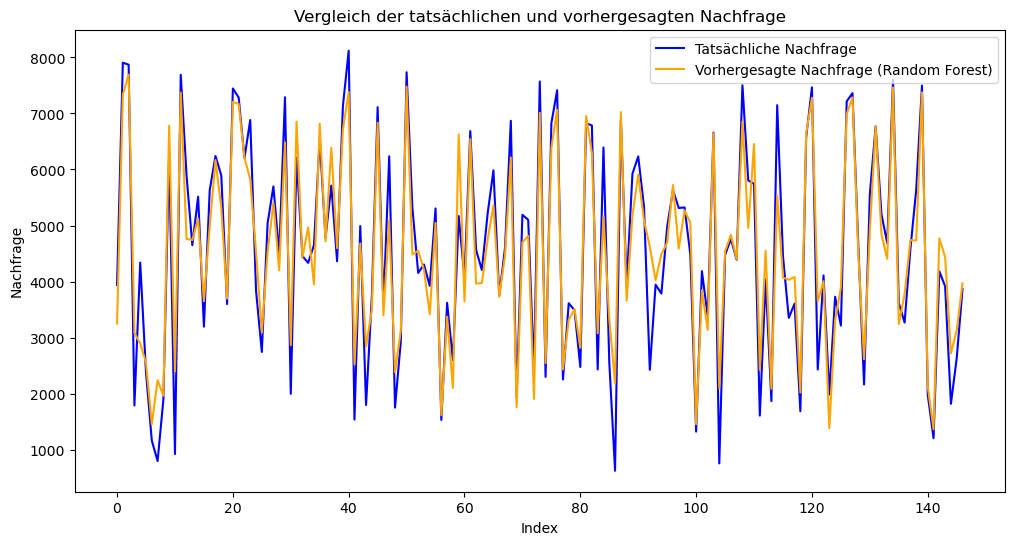

In [ ]:
plt.figure(figsize=(12, 6))

# Tatsächliche Werte
plt.plot(y_test.values, label='Tatsächliche Nachfrage', color='blue')

# Vorhergesagte Werte
plt.plot(y_pred_rf2, label='Vorhergesagte Nachfrage (Random Forest)', color='orange')

plt.xlabel('Index')
plt.ylabel('Nachfrage')
plt.title('Vergleich der tatsächlichen und vorhergesagten Nachfrage')
plt.legend()
plt.show()

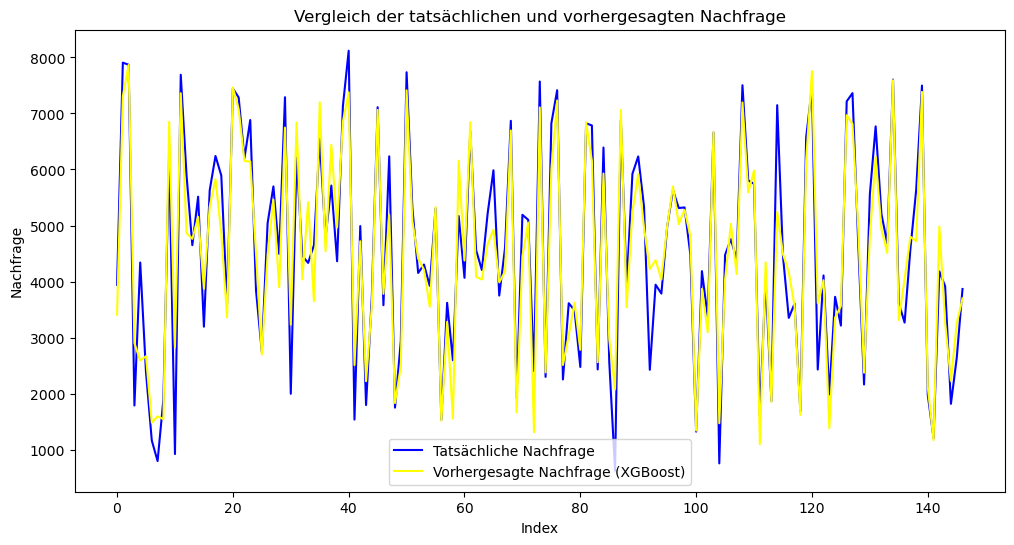

In [ ]:


plt.figure(figsize=(12, 6))

# Tatsächliche Werte
plt.plot(y_test.values, label='Tatsächliche Nachfrage', color='blue')

# Vorhergesagte Werte
plt.plot(y_pred_xgb2, label='Vorhergesagte Nachfrage (XGBoost)', color='yellow')

plt.xlabel('Index')
plt.ylabel('Nachfrage')
plt.title('Vergleich der tatsächlichen und vorhergesagten Nachfrage')
plt.legend()
plt.show()


Datensatz ohne zeitliche Merkmale

In [ ]:
X_train.columns

Index(['month', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Few Clouds', 'weathersit_Partly Cloudy', 'date_numeric'],
      dtype='object')

In [ ]:
# Spalten mit zeitlichen Merkmalen
time_season_columns = ['month', 'holiday', 'weekday', 'workingday', 'season_Spring', 'season_Summer', 'season_Winter', 'date_numeric']  # Passe an deine Feature-Namen an

# Neuen Datensatz erstellen ohne diese Features
X_train2 = X_train.drop(columns=time_season_columns)
X_test2 = X_test.drop(columns=time_season_columns)

In [ ]:
X_train2.columns

Index(['atemp', 'hum', 'windspeed', 'weathersit_Few Clouds',
       'weathersit_Partly Cloudy'],
      dtype='object')

In [ ]:
# trainieren und vergleichen
lr_modelD2 = LinearRegression()
lr_modelD2.fit(X_train2, y_train)
y_pred_lrD2 = lr_modelD2.predict(X_test2)

r2_lrD2 = r2_score(y_test, y_pred_lrD2)
mse_lrD2 = mean_squared_error(y_test, y_pred_lrD2)

print(f'R²-Score ohne zeitliche/saisonale Features: {r2_lrD2}')
print(f'MSE ohne zeitliche/saisonale Features: {mse_lrD2}')

R²-Score ohne zeitliche/saisonale Features: 0.4574850164152786
MSE ohne zeitliche/saisonale Features: 2004598.8117498443


In [ ]:
# Neues Random Forest Modell für den Datensatz ohne zeitliche Merkmale
rf_modelD2 = RandomForestRegressor(random_state=42)

 # Definiere den Parameterraum für Random Forest
param_dist_rfD2 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],  
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# RandomizedSearchCV für Random Forest auf den neuen Daten 
random_search_rfD2 = RandomizedSearchCV(rf_modelD2, param_distributions=param_dist_rfD2, 
                                        n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)

# Training auf den neuen Trainingsdaten (X_train2 und y_train)
random_search_rfD2.fit(X_train2, y_train)

# Beste Parameter und Ergebnisse ausgeben
print("Beste Parameter für rf_modelD2: ", random_search_rfD2.best_params_)
print("Beste R²-Score für rf_modelD2: ", random_search_rfD2.best_score_)

# Vorhersagen auf den neuen Testdaten
y_pred_rfD2 = random_search_rfD2.best_estimator_.predict(X_test2)

# MSE für das optimierte Modell berechnen
mse_rfD2 = mean_squared_error(y_test, y_pred_rfD2)
print(f'Random Forest MSE für rf_modelD2: {mse_rfD2}')

# Cross-Validation R²-Score für das optimierte Modell berechnen
rfD2_cv_r2 = cross_val_score(random_search_rfD2.best_estimator_, X_train2, y_train, cv=5, scoring='r2')
print(f'Random Forest CV R²-Score für rf_modelD2: {rfD2_cv_r2.mean()}')


Beste Parameter für rf_modelD2:  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Beste R²-Score für rf_modelD2:  0.5753506675479148
Random Forest MSE für rf_modelD2: 1821479.3843119883
Random Forest CV R²-Score für rf_modelD2: 0.5753506675479148


                    Feature  Importance
0                     atemp    0.622238
1                       hum    0.177687
2                 windspeed    0.157993
3     weathersit_Few Clouds    0.021465
4  weathersit_Partly Cloudy    0.020617


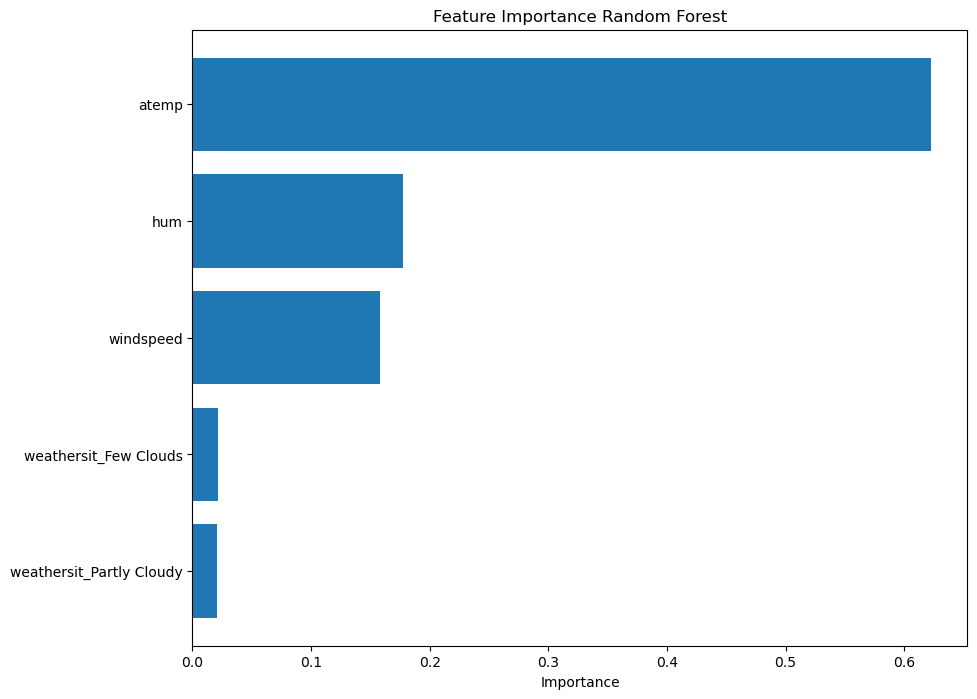

In [ ]:
best_rf_modelD2 = random_search_rfD2.best_estimator_

# Berechne die Feature-Wichtigkeit für das beste XGBoost-Modell
importances = best_rf_modelD2.feature_importances_

# Erstelle eine DataFrame zur besseren Übersicht
features = X_train2.columns  # Annahme: Spaltennamen sind in X_train definiert
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sortiere nach Wichtigkeit
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt

# Feature-Wichtigkeit plotten
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Definiere den XGBoost Regressor
xgb_modelD2 = xgb.XGBRegressor()

# Definiere den Parameterraum für XGBoost
param_dist_xgbD2 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV für XGBoost
random_search_xgbD2 = RandomizedSearchCV(xgb_modelD2, param_distributions=param_dist_xgbD2, 
                                          n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)

# Fit auf den Trainingsdaten
random_search_xgbD2.fit(X_train2, y_train)

# Beste Parameter und Ergebnisse ausgeben
print("Beste Parameter für xgbD2_model: ", random_search_xgbD2.best_params_)
print("Bester R²-Score für xgbD2_model: ", random_search_xgbD2.best_score_)

# Vorhersagen auf den Testdaten machen
best_xgbD2_model = random_search_xgbD2.best_estimator_
y_pred_xgbD2 = best_xgbD2_model.predict(X_test2)

# MSE berechnen
mse_xgbD2 = mean_squared_error(y_test, y_pred_xgbD2)
print(f"XGBoost MSE für xgbD2_model: {mse_xgbD2}")

# Cross-Validation R²-Score berechnen
xgbD2_cv_r2 = cross_val_score(best_xgbD2_model, X_train2, y_train, cv=5, scoring='r2')
print(f'XGBoost CV R²-Score für xgbD2_model: {xgbD2_cv_r2.mean()}')

Beste Parameter für xgbD2_model:  {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Bester R²-Score für xgbD2_model:  0.5468439643361714
XGBoost MSE für xgbD2_model: 2010475.871394256
XGBoost CV R²-Score für xgbD2_model: 0.5468439643361714


                    Feature  Importance
0                     atemp    0.324255
4  weathersit_Partly Cloudy    0.259860
1                       hum    0.150284
2                 windspeed    0.136143
3     weathersit_Few Clouds    0.129458


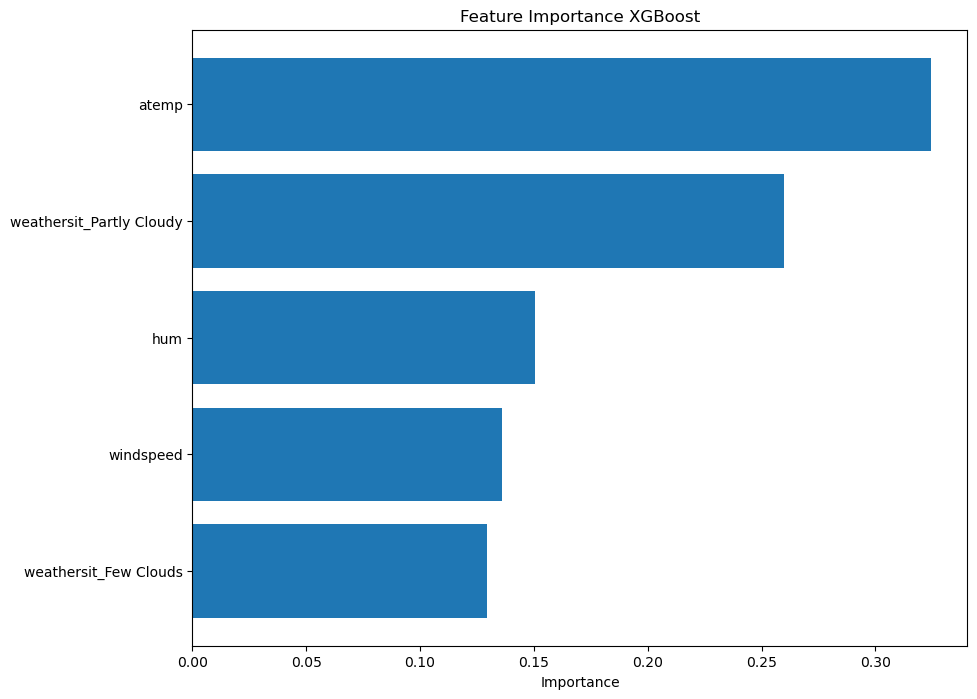

In [ ]:
best_xgb_modelD2 = random_search_xgbD2.best_estimator_

# Berechne die Feature-Wichtigkeit für das beste XGBoost-Modell
importances = best_xgb_modelD2.feature_importances_

# Erstelle eine DataFrame zur besseren Übersicht
features = X_train2.columns  # Annahme: Spaltennamen sind in X_train2 definiert
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sortiere nach Wichtigkeit
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt

# Feature-Wichtigkeit plotten
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(f'Lineare Regression R²-Score für lrD2_model Features: {r2_lrD2}')
print("Random Forest Bester R²-Score für rfD2_model: ", random_search_rfD2.best_score_)
print("XGBoost Bester R²-Score für xgbD2_model: ", random_search_xgbD2.best_score_)

print('')
print(f'Lineare Regression MSE für lrD2_model: {mse_lrD2}')
print(f'Random Forest MSE für rfD2_model: {mse_rfD2}')
print(f"XGBoost MSE für xgbD2_model: {mse_xgbD2}")


Lineare Regression R²-Score für lrD2_model Features: 0.4574850164152786
Random Forest Bester R²-Score für rfD2_model:  0.5753506675479148
XGBoost Bester R²-Score für xgbD2_model:  0.5468439643361714

Lineare Regression MSE für lrD2_model: 2004598.8117498443
Random Forest MSE für rfD2_model: 1821479.3843119883
XGBoost MSE für xgbD2_model: 2010475.871394256


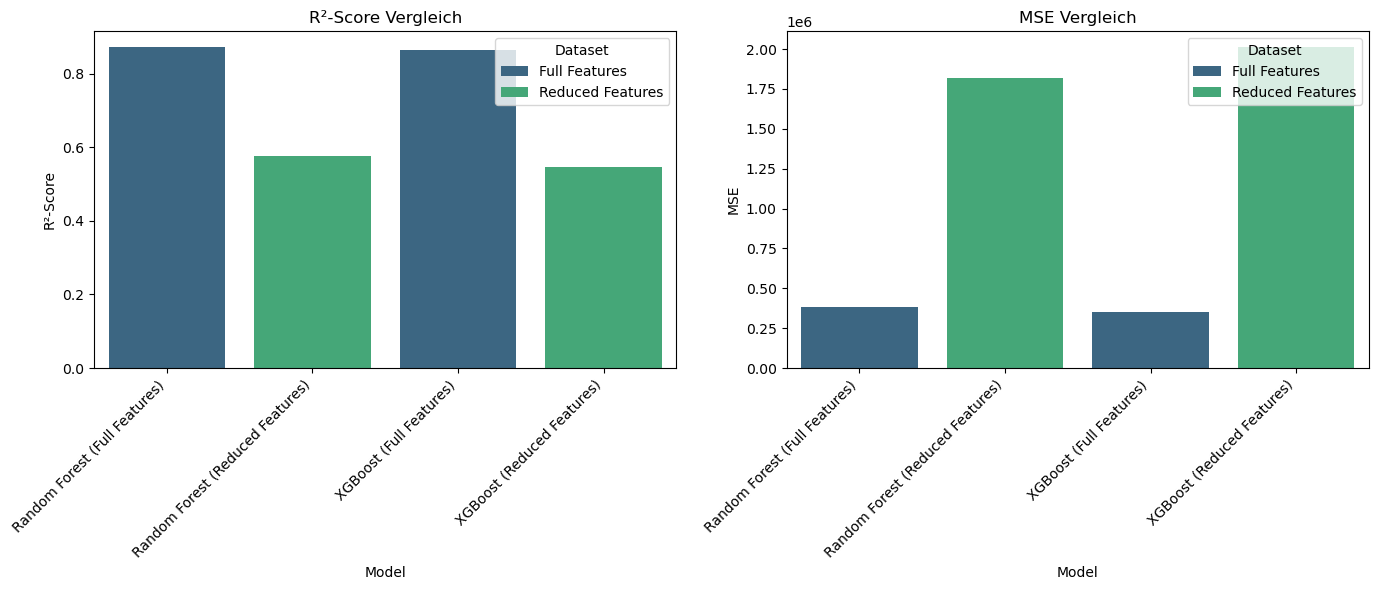

In [ ]:
# Ergebnisse zusammenfassen
model_results_comparison = {
    'Model': ['Random Forest (Full Features)', 'Random Forest (Reduced Features)', 'XGBoost (Full Features)', 'XGBoost (Reduced Features)'],
    'Dataset': ['Full Features', 'Reduced Features', 'Full Features', 'Reduced Features'],
    'R²-Score': [rf_cv_r2.mean(), rfD2_cv_r2.mean(), xgb_cv_r2.mean(), xgbD2_cv_r2.mean()],
    'MSE': [mse_rf2, mse_rfD2, mse_xgb2, mse_xgbD2]
}

# DataFrame erstellen
results_comparison_df = pd.DataFrame(model_results_comparison)

# Balkendiagramm für R²-Score
plt.figure(figsize=(14, 6))

# R²-Score Diagramm
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R²-Score', hue='Dataset', data=results_comparison_df, palette='viridis')
plt.title('R²-Score Vergleich')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R²-Score')

# MSE Diagramm
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MSE', hue='Dataset', data=results_comparison_df, palette='viridis')
plt.title('MSE Vergleich')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


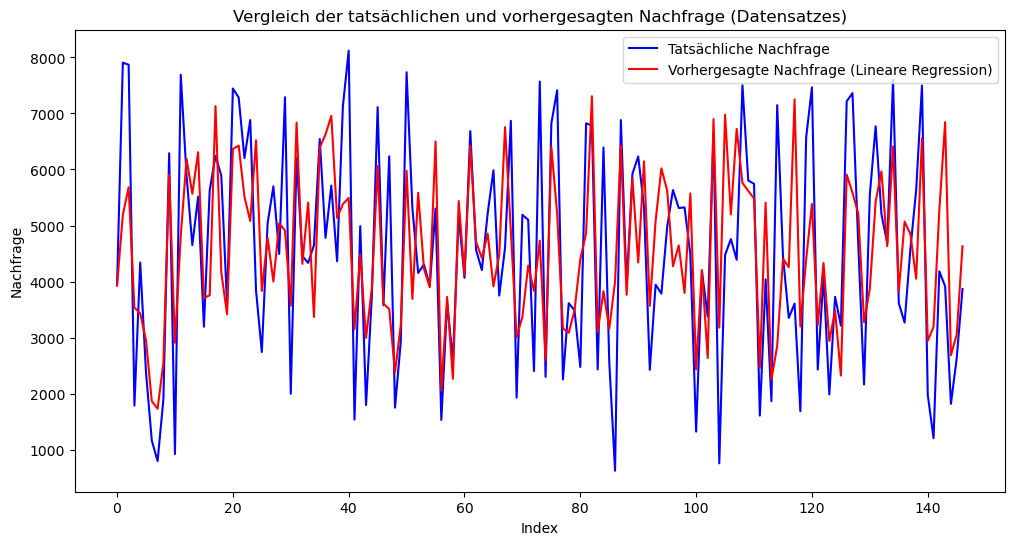

In [ ]:
plt.figure(figsize=(12, 6))

# Tatsächliche Werte
plt.plot(y_test.values, label='Tatsächliche Nachfrage', color='blue')

# Vorhergesagte Werte
plt.plot(y_pred_lrD2, label='Vorhergesagte Nachfrage (Lineare Regression)', color='red')

plt.xlabel('Index')
plt.ylabel('Nachfrage')
plt.title('Vergleich der tatsächlichen und vorhergesagten Nachfrage (Datensatzes)')
plt.legend()
plt.show()

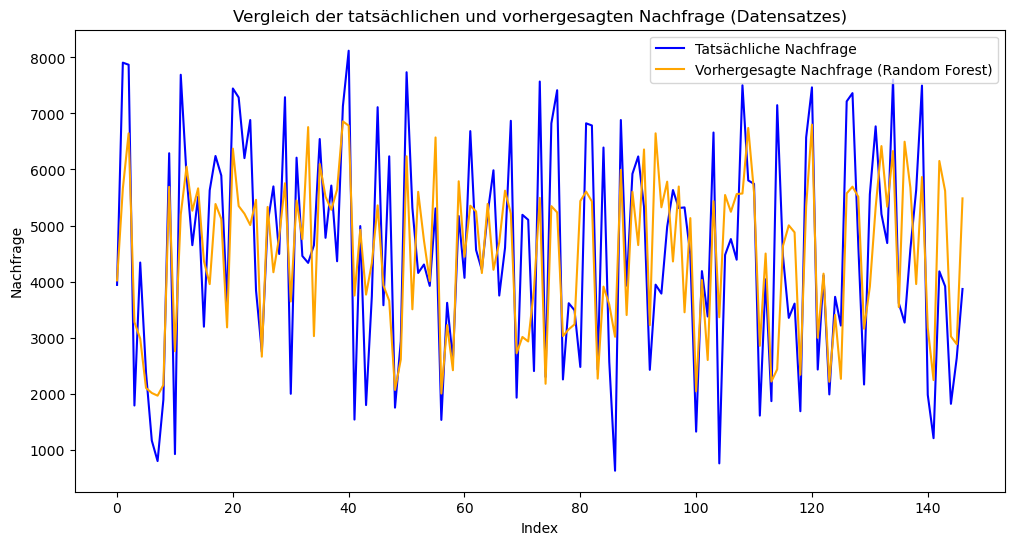

In [ ]:
plt.figure(figsize=(12, 6))

# Tatsächliche Werte
plt.plot(y_test.values, label='Tatsächliche Nachfrage', color='blue')

# Vorhergesagte Werte
plt.plot(y_pred_rfD2, label='Vorhergesagte Nachfrage (Random Forest)', color='orange')

plt.xlabel('Index')
plt.ylabel('Nachfrage')
plt.title('Vergleich der tatsächlichen und vorhergesagten Nachfrage (Datensatzes)')
plt.legend()
plt.show()

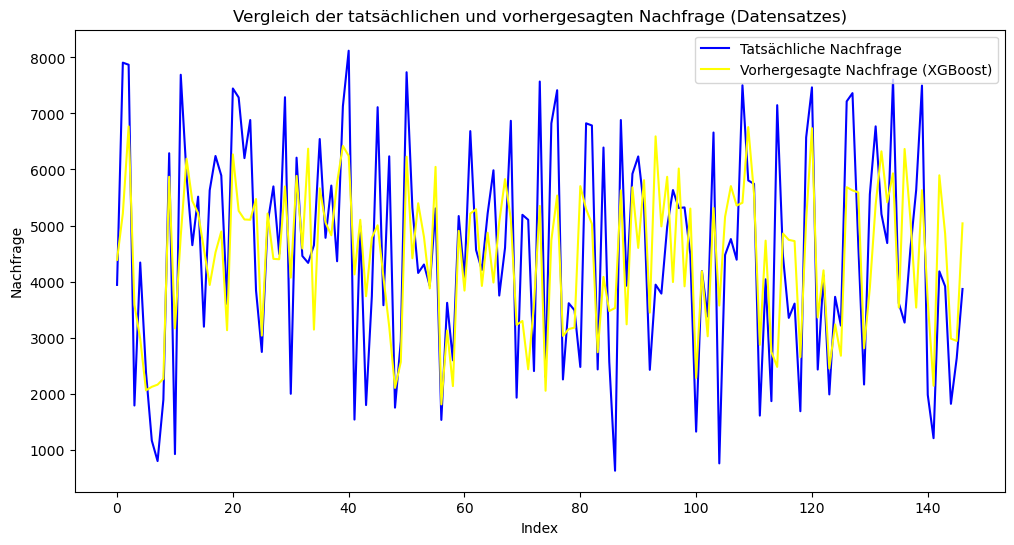

In [ ]:
plt.figure(figsize=(12, 6))

# Tatsächliche Werte
plt.plot(y_test.values, label='Tatsächliche Nachfrage', color='blue')

# Vorhergesagte Werte
plt.plot(y_pred_xgbD2, label='Vorhergesagte Nachfrage (XGBoost)', color='yellow')

plt.xlabel('Index')
plt.ylabel('Nachfrage')
plt.title('Vergleich der tatsächlichen und vorhergesagten Nachfrage (Datensatzes)')
plt.legend()
plt.show()